<a href="https://colab.research.google.com/github/AndriiFedorchuk/Andrii/blob/master/Main_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main assumptions

The purpose of this project is to train the neural network, which, based on the hobby and the interests of the person, will guess its gender.

It is worth saying that the author of the project does NOT believe that certain interests and hobbies are inherent only in men or only women, just as he does not support the view that certain hobbies are pure "male" or "female".

The author also respects people's right to self-identification, including gender one. The division of people into two genders was chosen only due to the fact, that the corresponding division was in the data set from which the author took the main data.

The author of the project only believes that in 2020, there are still some factors that encourage people to choose their interests in such a way that there is a statistically significant difference between the interests of genders. These factors include, but are not limited to:
- traditional education
- the influence of people with traditional views
- society's expectation that a person will behave according to his or her gender role
- the effect of hormones (in particular testosterone stimulates interest in competitiveness and cruelty)
- etc.

Based on all of the above, the author believes that in 2020 it is impossible to guess the gender of a person with 100% accuracy, based only on its interests and hobbies, but thinks that it is quite possible to expect a guessing accuracy at the order of 70-85%.

# Data importing

To begin with, we import the basic tools and the main file. The file is in .swc format and was manually created by the author based on an open-source data set.

[https://www.kaggle.com/miroslavsabo/young-people-survey#columns.csv](https://www.kaggle.com/miroslavsabo/young-people-survey#columns.csv)

The number of parameters was reduced from 150 to 33, of which 32 are hobbies and interests of the person, and 1 - its gender.

In order to simplify my task I marked genders with numbers:
- 0 - male
- 1 - female

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


URL = 'https://raw.githubusercontent.com/AndriiFedorchuk/Andrii/master/main_fa.csv'    
dataset = pd.read_csv(URL)                                                             
dataset.head(10)                                                                      

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,Countryside and outdoors,Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Gender
0,1,5,1,3,3,5,3,5,3,3,3,3,5,3,1,1,1,1,5,3,3,2,1,5,5,1,4,4,2,5,4,4,1
1,1,3,4,5,2,4,4,5,1,1,4,4,5,1,2,2,2,1,1,1,1,1,1,1,1,2,3,3,2,4,2,5,1
2,1,2,1,5,2,4,2,4,1,1,5,2,5,2,3,1,5,5,5,5,5,5,5,2,1,1,4,2,5,5,5,5,1
3,4,4,5,4,1,3,1,2,3,3,5,4,4,2,5,1,5,4,1,1,1,3,1,1,1,2,4,3,1,2,1,1,1
4,3,2,3,2,2,2,2,2,3,3,5,2,3,3,2,3,1,4,4,1,3,1,3,1,4,3,3,3,2,4,2,1,1
5,5,3,4,2,3,4,4,1,4,4,3,3,4,4,3,5,2,2,5,1,5,1,5,4,2,1,2,3,1,3,3,2,0
6,3,3,1,1,1,2,1,3,5,5,3,3,4,5,3,4,1,1,4,3,2,1,5,3,3,1,3,4,3,5,1,5,1
7,5,2,3,1,1,5,4,1,2,2,2,3,4,1,2,1,1,2,2,1,1,1,4,5,1,3,3,2,2,4,2,5,0
8,3,2,1,1,1,1,1,1,3,1,5,1,1,1,1,1,1,2,4,1,2,1,4,1,1,5,2,1,5,4,1,1,1
9,3,2,3,3,1,5,1,4,2,1,4,4,5,1,1,1,4,4,4,5,3,1,4,4,1,2,4,3,5,5,2,2,1


# Dividing the datasheet

Here I divided a dataset in two parts.

All interests and hobbies I marked as x (my input) and gender as y (my output).

Also, I divided all data into training data (80%) and testing data (20%).


In [0]:
x = dataset.iloc[:,:32].values
y = dataset.iloc[:,32].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

# print info about a shape of arrays
print(x_train.shape, 'train samples for parameters')
print(y_train.shape, 'train samples for output - Gender')
print(x_test.shape, 'test samples  for parameters')
print(y_test.shape, 'test samples for output - Gender')

(800, 32) train samples for parameters
(800,) train samples for output - Gender
(200, 32) test samples  for parameters
(200,) test samples for output - Gender


# Checking clustering of data

I import PCA methods and project the data from 32-dimensional space into 2-dimensional in a way, that the difference between the responses of different genders is as clear as possible.

As we can see from this graph, even when looking at the projection in 2D space, we can see that there is some visible difference between interests and hobbies, which are more characteristic for males and females.

(1000, 32)
(1000, 2)


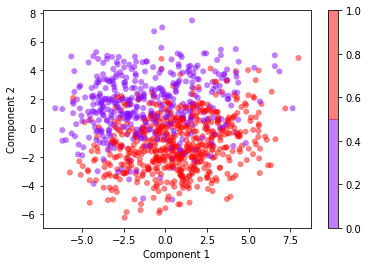

In [0]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(2) 
projected = pca.fit_transform(x)
print(x.shape)
print(projected.shape)

plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 2))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

# Data overview

The graphs below show a comparison of the average score for different interests and hobbies, done by men and women. As we can see, there are interests that women have marked with a higher score (Reading, Shopping, Dancing), and there are interests that are more expressed in men lifes (Science and technology, PC, Cars).

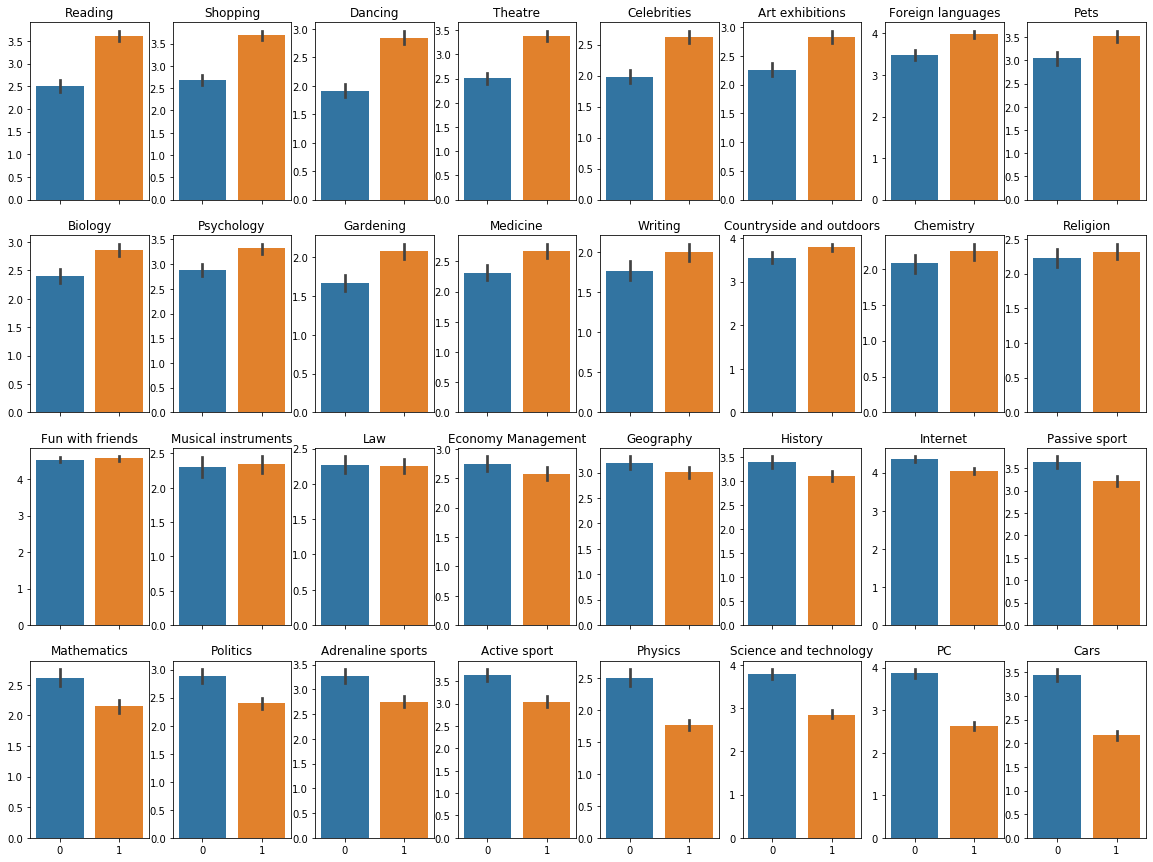

In [0]:
import seaborn as sns

main_columns = ['Reading', 'Shopping', 'Dancing', 'Theatre', 'Celebrities', 
                'Art exhibitions', 'Foreign languages', 'Pets', 'Biology',
                'Psychology', 'Gardening', 'Medicine', 'Writing', 'Countryside and outdoors',
                'Chemistry', 'Religion', 'Fun with friends', 'Musical instruments',
                'Law', 'Economy Management', 'Geography', 'History', 'Internet',
                'Passive sport', 'Mathematics', 'Politics', 'Adrenaline sports',
                'Active sport',	'Physics', 'Science and technology', 'PC', 'Cars']

fig, ax = plt.subplots(nrows=4, ncols=8 ,figsize=(20,15), sharex=True)
start = 0
for j in range(4):
    for i in range(8):
        if start == len(good_columns):
            break
        sns.barplot(y=main_columns[start], x='Gender', data=dataset, ax=ax[j,i])
        ax[j,i].set_ylabel('')
        ax[j,i].set_xlabel('')
        ax[j,i].set_title(main_columns[start], fontsize=12)
        start += 1

# Simple classifiers

Before building neural networks, we can test how we can perform our task using simple classifiers like
- GaussianNB
- LinearDiscriminantAnalysis
- KNeighborsClassifier
- MLPClassifier

In [0]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

#clf = GaussianNB()
#clf = LinearDiscriminantAnalysis()
clf = KNeighborsClassifier(5)
#clf =  MLPClassifier(alpha=0.05, max_iter=10000,solver='adam', random_state=1,
#                hidden_layer_sizes=[100, 100],early_stopping=True,
#                verbose=10, tol=0.00001)

print(clf.fit(x_train, y_train))
#print(clf.feature_importances_)  

# use the model to predict the labels of the test data
predicted = clf.predict(x_test)
expected = y_test


print("Score train = ",clf.score(x_train, y_train))
print("Score test  = ",clf.score(x_test, y_test))

from sklearn import metrics

print('Confusion matrix:')
print(metrics.confusion_matrix(expected, predicted))
plt.show()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Score train =  0.8875
Score test  =  0.8
Confusion matrix:
[[ 57  18]
 [ 22 103]]


# Building a neural network

Here I build my neural network and check its structure. 

In [0]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Neural network
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(32,)))
#model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_78 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_79 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_80 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_81 (Dense)             (None, 2)                 34        
Total params: 1,378
Trainable params: 1,378
Non-trainable params: 0
_________________________________________________________________


# Training a neural network

In [0]:
batch_size = 100
num_classes = 2
epochs = 50

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 [==============================] - 2s 2ms/step - loss: 0.7021 - acc: 0.5062 - val_loss: 0.6684 - val_acc: 0.6250
Epoch 2/50
800/800 [==============================] - 0s 29us/step - loss: 0.6560 - acc: 0.5875 - val_loss: 0.6311 - val_acc: 0.6250
Epoch 3/50
800/800 [==============================] - 0s 32us/step - loss: 0.6324 - acc: 0.5887 - val_loss: 0.6071 - val_acc: 0.6350
Epoch 4/50
800/800 [==============================] - 0s 28us/step - loss: 0.6016 - acc: 0.6412 - val_loss: 0.5822 - val_acc: 0.7050
Epoch 5/50
800/800 [==============================] - 0s 31us/step - loss: 0.5642 - acc: 0.7088 - val_loss: 0.5529 - val_acc: 0.7250
Epoch 6/50
800/800 [==============================] - 0s 31us/step - loss: 0.5266 - acc: 0.7512 - val_loss: 0.5157 - val_acc: 0.7650
Epoch 7/50
800/800 [==============================] - 0s 33us/step - loss: 0.4900 - acc: 0.7838 - val_loss: 0.4881 - val_acc: 0.7650
Epoch 8/50
800/800 [====

# Checking neural network efficiency

Score train =  0.8875
Score test  =  0.8
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        75
           1       0.85      0.82      0.84       125

    accuracy                           0.80       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.80      0.80      0.80       200

Confusion matrix:
[[ 57  18]
 [ 22 103]]


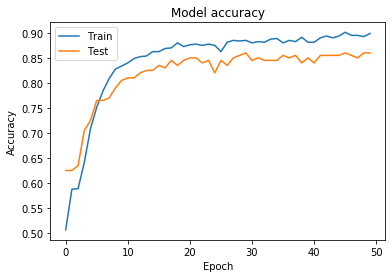

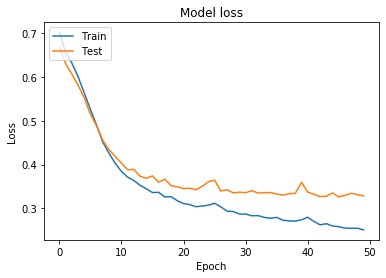

In [0]:
import matplotlib.pyplot as plt

print("Score train = ",clf.score(x_train, y_train))
print("Score test  = ",clf.score(x_test, y_test))

from sklearn import metrics
print(metrics.classification_report(expected, predicted))

print('Confusion matrix:')
print(metrics.confusion_matrix(expected, predicted))
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

# Conclusion

- While doing this task, I realized that I could analyze datasets and create neural networks for my needs
- I have created and imported a dataset and analyzed it, using both simple classificators and neural network classificator.
- The efficiency of neural network classification and simple classificators are at the same range (80-85%), what can be explained by a small dataset and a complexity of a task, which makes it impossible to have much better efficiency.
